# Task
Check the logs and see which FAQs are the most clicked: https://www.uniprot.org/help/?fil=section:faq

# Step 1: Scrape
Scrape that page to get all of the HREF links using the BeautifulSoup python library:

In [1]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.uniprot.org/help/?query=*&fil=section%3Afaq'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
entries = soup.find_all(class_='entry')
hrefs = [entry.find('a', href=True)['href'] for entry in entries]
print(hrefs)

['/help/api', '/help/binary_interactions_import', '/help/canonical_and_isoforms', '/help/canonical_nucleotide', '/help/cds_protein_definition', '/help/chemical_data_search', '/help/complete_go_annotation', '/help/copyright', '/help/creation_date', '/help/date_formats', '/help/deleted_accessions', '/help/difference_accession_entryname', '/help/different_protein_gene_names', '/help/disease_query', '/help/download_human_viruses', '/help/download_mapping', '/help/download_subsequences', '/help/dubious_sequences', '/help/entries_since_rel_x', '/help/entry_count', '/help/evidence_in_swissprot', '/help/evidence_table', '/help/extinct_organisms', '/help/family_membership', '/help/gene_symbol_mapping']


# Step 2: Create RegExp
Create a big RegExp string with each HREF seperated by an `|` to indicate "or". Also remove `/help` sub-path and ensure we don't match substrings by using `^` to mark the beginning of the HREf and `$` to mark the end.

In [2]:
hrefs = [href.replace('/help', '') for href in hrefs]
hrefs = [f'^{href}$' for href in hrefs]
print('|'.join(hrefs))

^/api$|^/binary_interactions_import$|^/canonical_and_isoforms$|^/canonical_nucleotide$|^/cds_protein_definition$|^/chemical_data_search$|^/complete_go_annotation$|^/copyright$|^/creation_date$|^/date_formats$|^/deleted_accessions$|^/difference_accession_entryname$|^/different_protein_gene_names$|^/disease_query$|^/download_human_viruses$|^/download_mapping$|^/download_subsequences$|^/dubious_sequences$|^/entries_since_rel_x$|^/entry_count$|^/evidence_in_swissprot$|^/evidence_table$|^/extinct_organisms$|^/family_membership$|^/gene_symbol_mapping$


# Step 3: View `/help` content drilldown
1. Visit https://analytics.google.com/
2. Select `Bot Filtering` in https://www.uniprot.org/
3. Behavior > Content Drilldown
4. Click the `/help/` page path level1
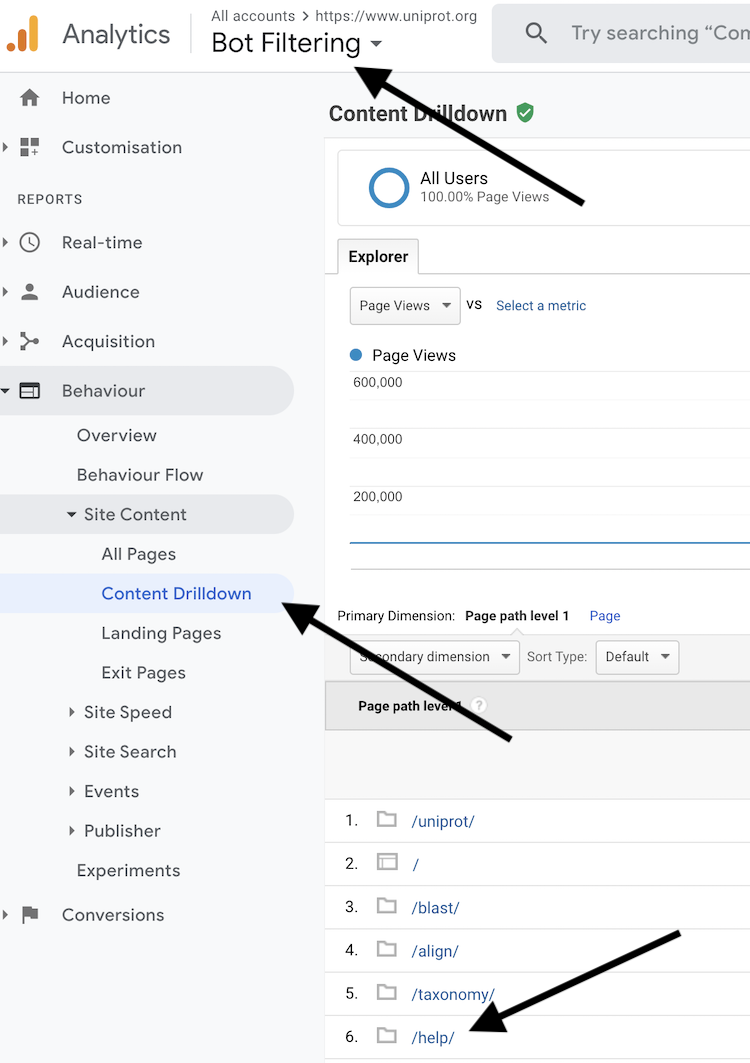

# Step 4: Create an advanced search
1. Select `advanced`
2. Select `Matching RegExp`
3. Paste above RegExp
4. Hit apply
5. Change date range to whatever is desired
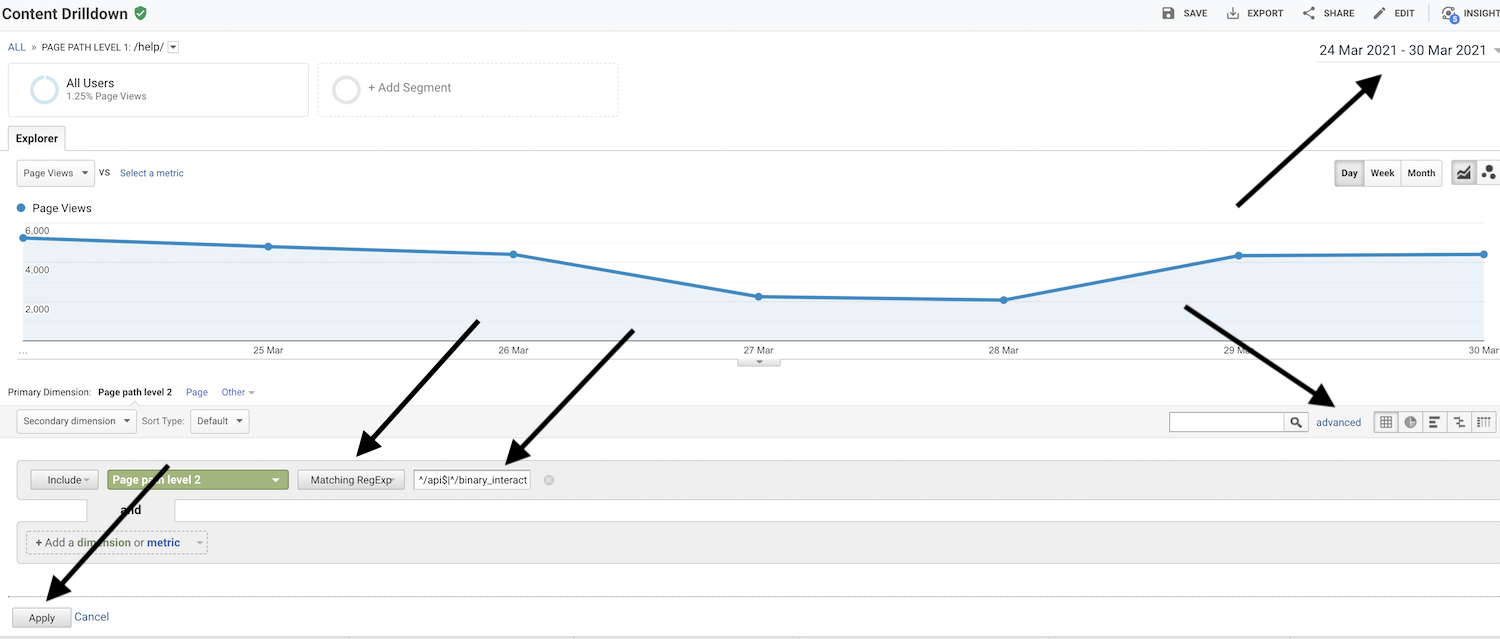

# Results

* [Saved report](https://analytics.google.com/analytics/web/#/savedreport/PztlYW7lSr-GMD1V1E_IxA/a6228219w12024207p212893250/_u.date00=20180330&_u.date01=20210330&_.advseg=&_.useg=&_.sectionId=&_r.dsa=1&_r.drilldown=analytics.pagePathLevel1:~2Fhelp~2F&explorer-table.plotKeys=%5B%5D&explorer-table.advFilter=%5B%5B0,%22analytics.pagePathLevel2%22,%22RE%22,%22%5E~2Fapi$%7C%5E~2Fbinary_interactions_import$%7C%5E~2Fcanonical_and_isoforms$%7C%5E~2Fcanonical_nucleotide$%7C%5E~2Fcds_protein_definition$%7C%5E~2Fchemical_data_search$%7C%5E~2Fcomplete_go_annotation$%7C%5E~2Fcopyright$%7C%5E~2Fcreation_date$%7C%5E~2Fdate_formats$%7C%5E~2Fdeleted_accessions$%7C%5E~2Fdifference_accession_entryname$%7C%5E~2Fdifferent_protein_gene_names$%7C%5E~2Fdisease_query$%7C%5E~2Fdownload_human_viruses$%7C%5E~2Fdownload_mapping$%7C%5E~2Fdownload_subsequences$%7C%5E~2Fdubious_sequences$%7C%5E~2Fentries_since_rel_x$%7C%5E~2Fentry_count$%7C%5E~2Fevidence_in_swissprot$%7C%5E~2Fevidence_table$%7C%5E~2Fextinct_organisms$%7C%5E~2Ffamily_membership$%7C%5E~2Fgene_symbol_mapping$%22,0%5D%5D&explorer-table.rowStart=0&explorer-table.rowCount=50/)
* [Spreadsheet with results (EBI account only)](https://docs.google.com/spreadsheets/d/185bqHNXYz2t5S8iKxYzafRwPNOFovokqFhLb_Echgok/edit?usp=sharing)

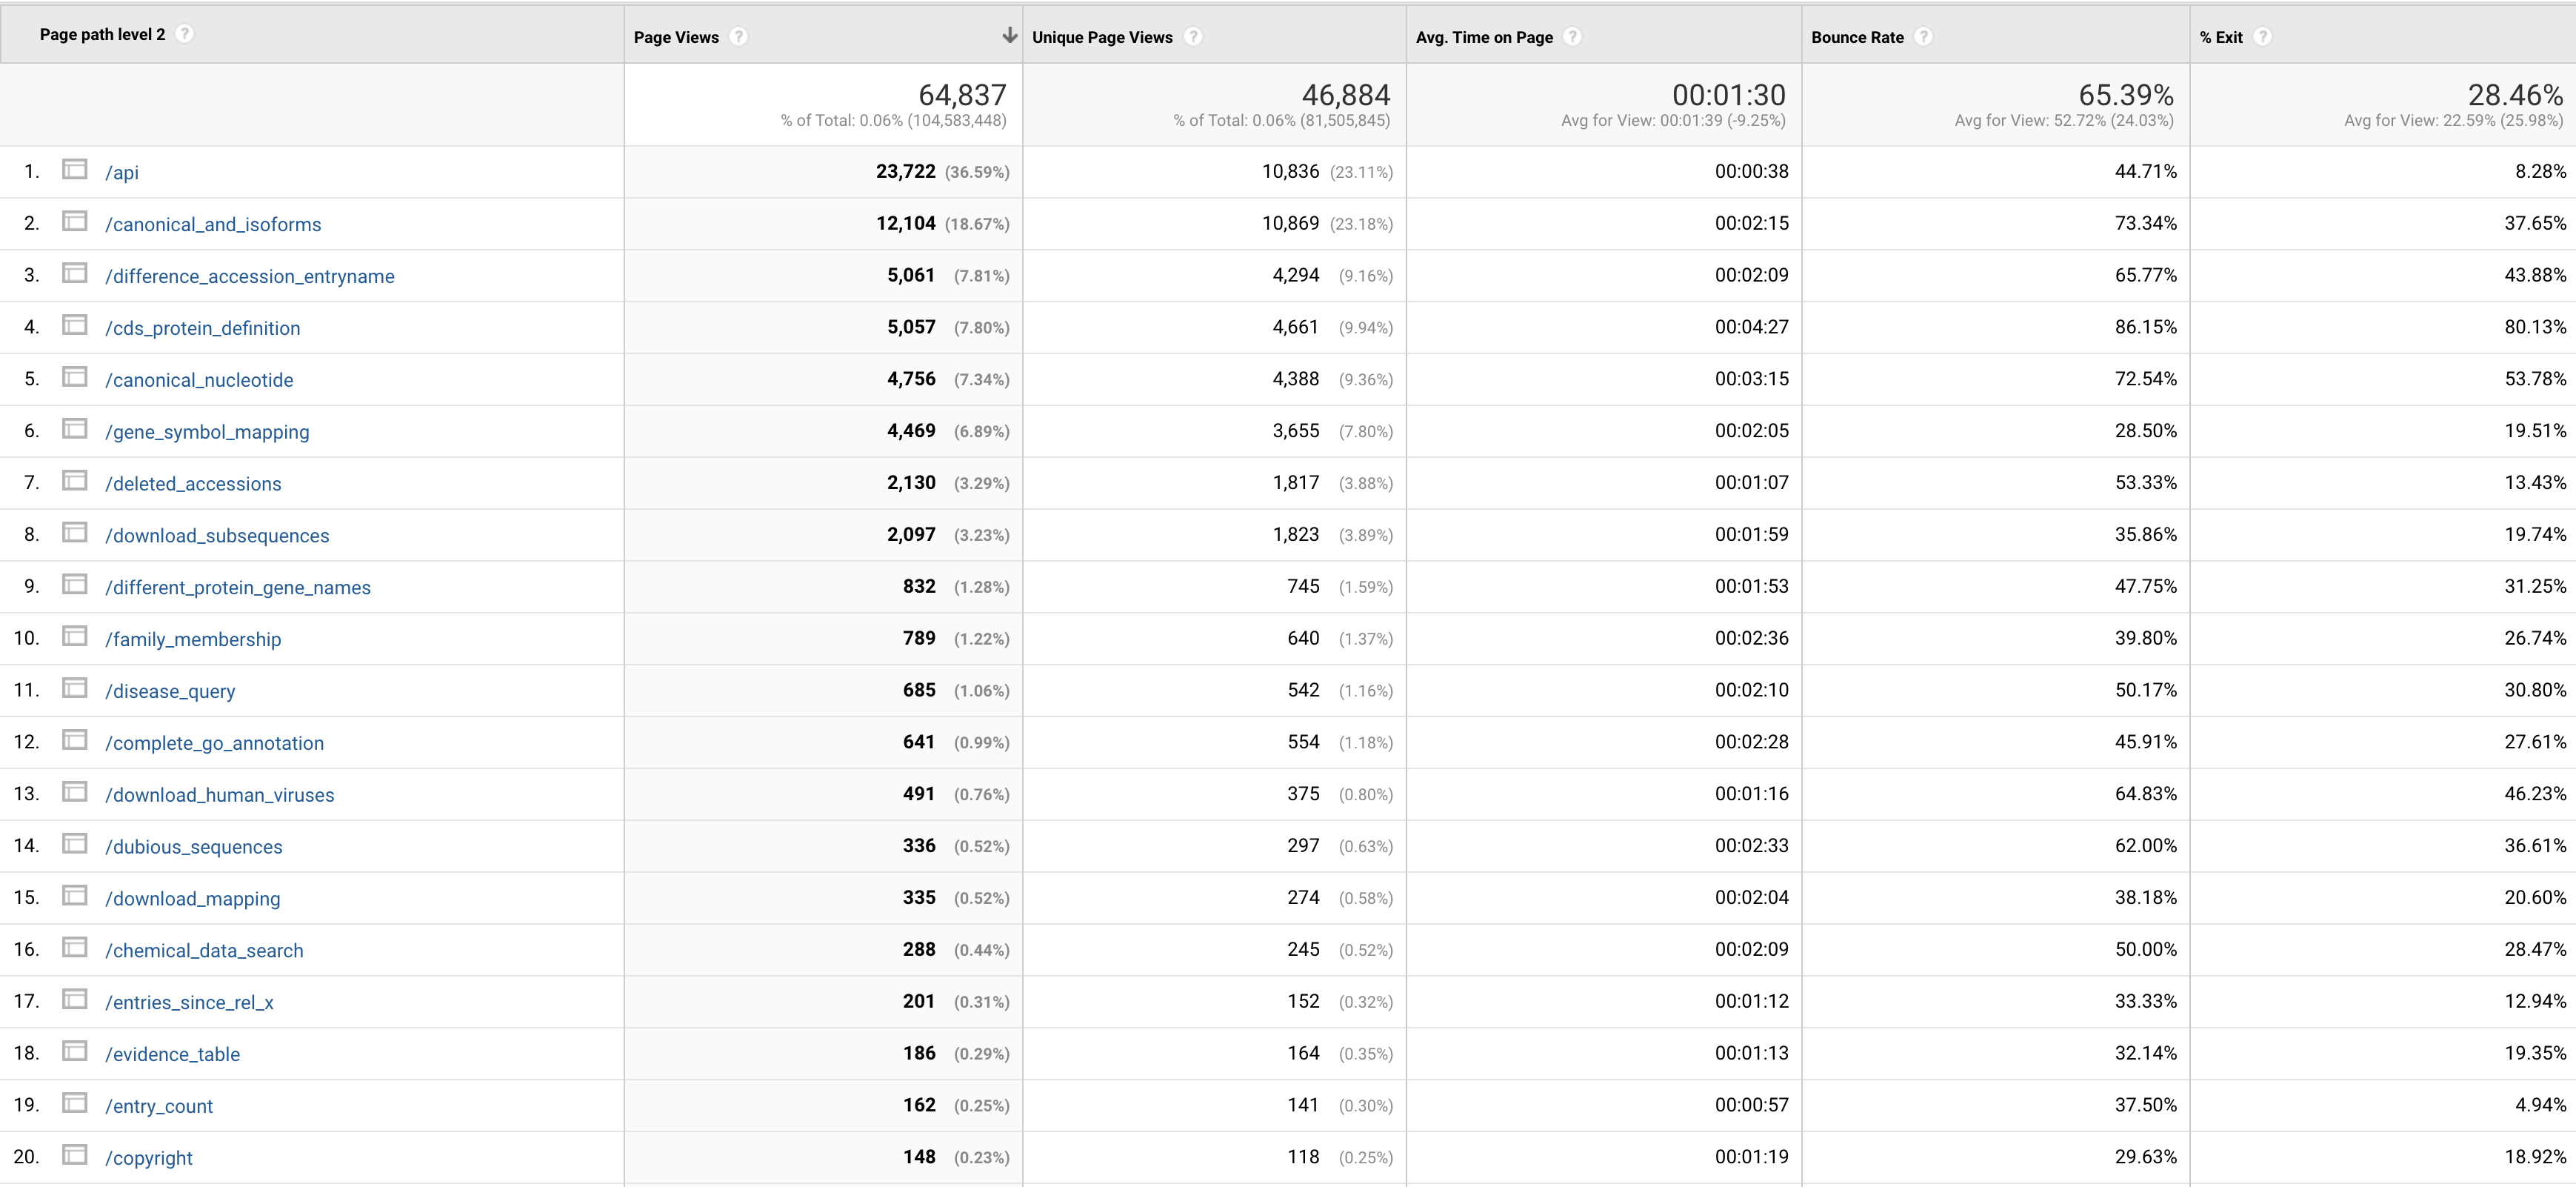

